In [541]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score,cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge,RidgeCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [486]:
filepath="https://github.com/dsrscientist/dataset1/raw/master/abalone.csv"
data=pd.read_csv(filepath)

In [487]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [488]:
### lets find the age froms the rings and then dropping the rings inplace of Age as in attribute it mention 1.5+Rings

data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

In [489]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [491]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [492]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [493]:
## from the above info we can conclude that
## there is no missing value
## all are numerical value except 'Sex'
## none have '0' value except height so we will check through visualization


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

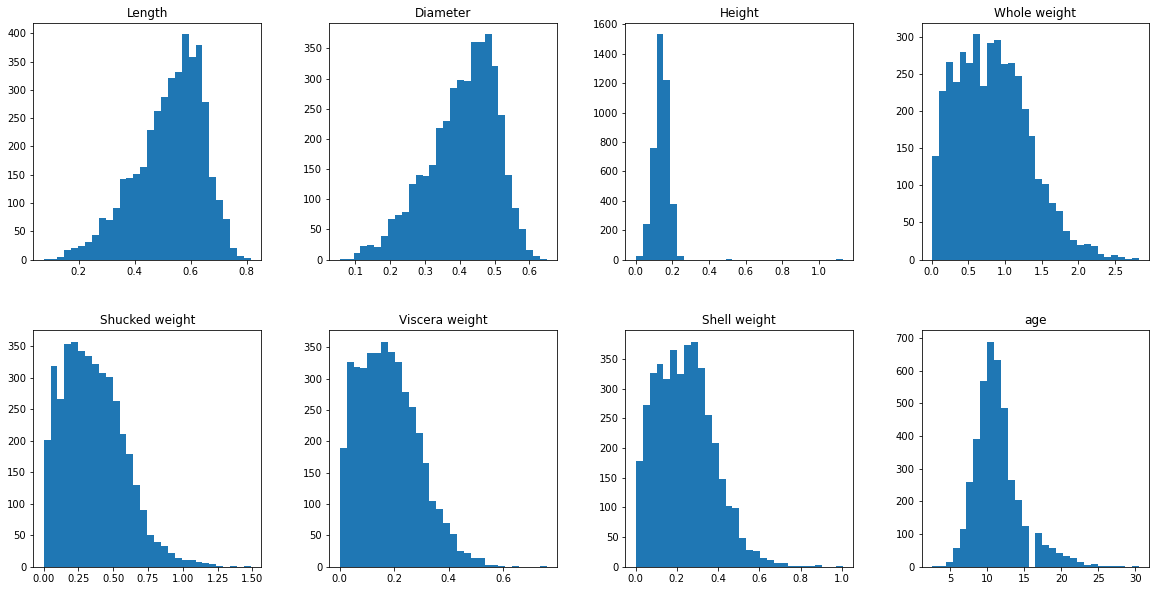

In [494]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [495]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [496]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

In [497]:
## height has the highest skewness followed by age(Skewness range is between +/-0.5)

<AxesSubplot:xlabel='Sex', ylabel='age'>

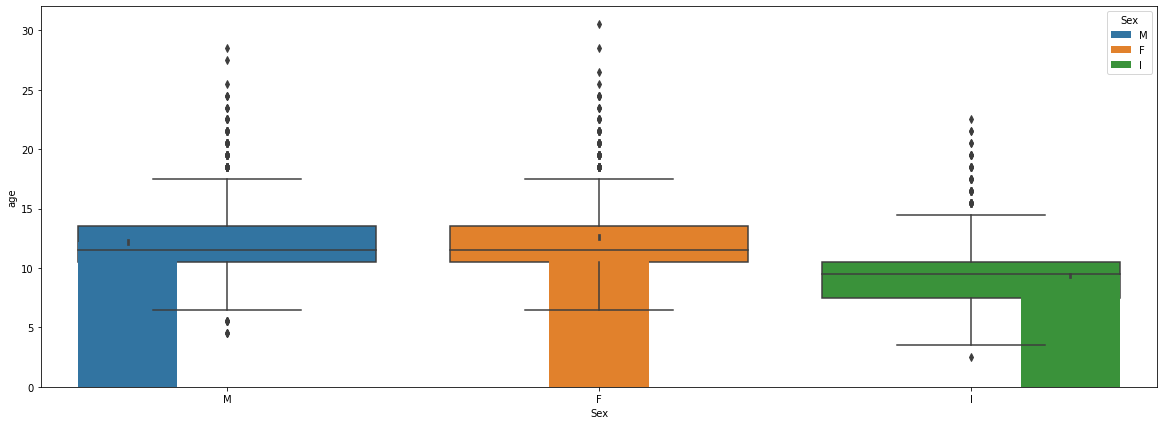

In [498]:
plt.figure(figsize = (20,7))
sns.barplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.boxplot(x = 'Sex', y = 'age', data = data)

In [499]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


In [500]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['Sex']=lab_enc.fit_transform(data['Sex'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


<AxesSubplot:>

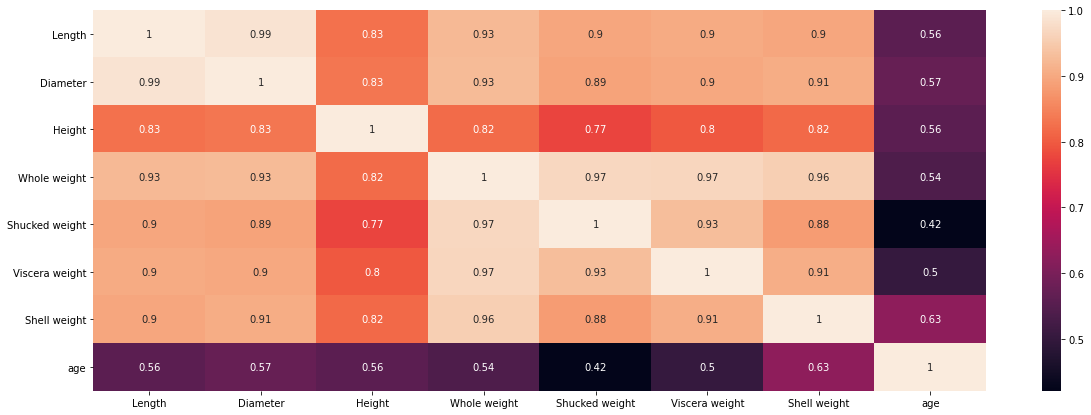

In [501]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

## To View Outlier

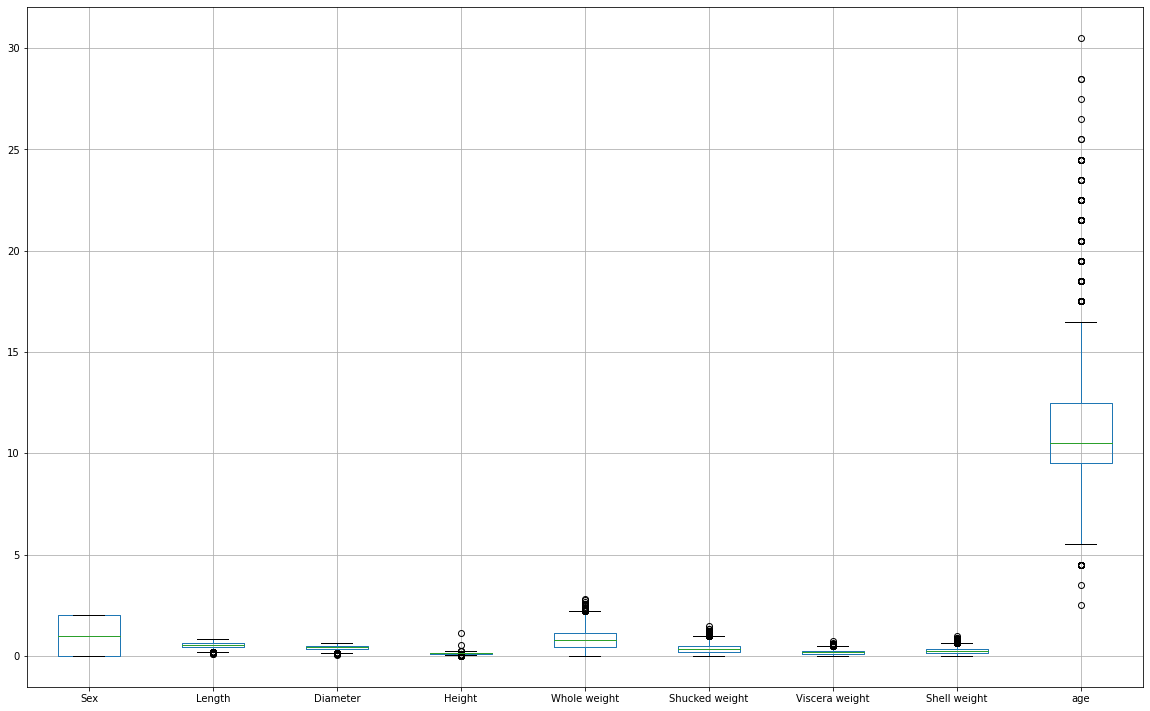

In [502]:
data.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=-0.30)
plt.show()

## To Remove Outlier

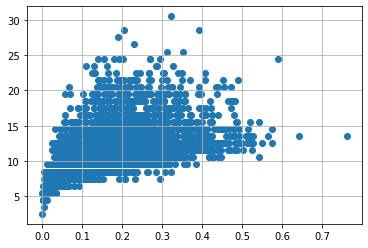

In [503]:
plt.scatter(x = data['Viscera weight'], y = data['age'],)
plt.grid(True)

In [504]:
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

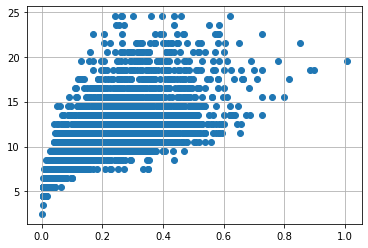

In [505]:
plt.scatter(x = data['Shell weight'], y = data['age'],)
plt.grid(True)

In [506]:
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

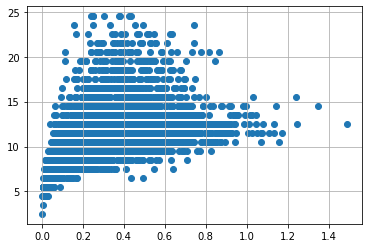

In [507]:
plt.scatter(x = data['Shucked weight'], y = data['age'],)
plt.grid(True)

In [508]:
data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)

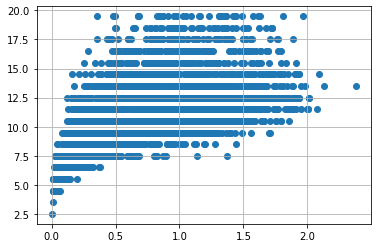

In [509]:
plt.scatter(x = data['Whole weight'], y = data['age'],)
plt.grid(True)

In [510]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

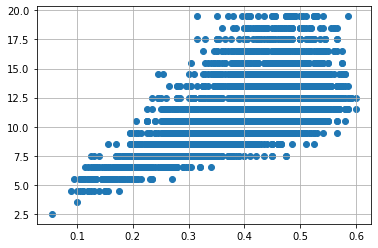

In [511]:
plt.scatter(x = data['Diameter'], y = data['age'],)
plt.grid(True)

In [512]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

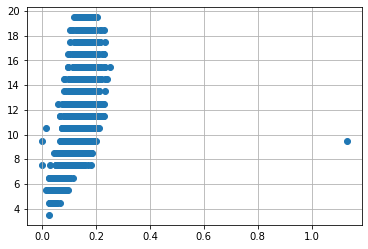

In [513]:
plt.scatter(x = data['Height'], y = data['age'],)
plt.grid(True)

In [514]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

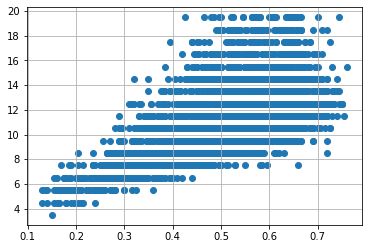

In [515]:
plt.scatter(x = data['Length'], y = data['age'],)
plt.grid(True)

In [516]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

## Splitting the data into features and the vector

In [517]:
## we can see that height and age skewness has been removed as seen below
data.skew() 

Sex              -0.095247
Length           -0.671472
Diameter         -0.645166
Height           -0.316450
Whole weight      0.303693
Shucked weight    0.432205
Viscera weight    0.420399
Shell weight      0.285967
age               0.571009
dtype: float64

In [518]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000
mean,1.051815,0.518168,0.402955,0.136972,0.791814,0.345022,0.173504,0.227166,11.127284
std,0.814594,0.117643,0.097127,0.037248,0.451790,0.205040,0.102633,0.125889,2.764955
min,0.000000,0.130000,0.095000,0.000000,0.010500,0.004500,0.000500,0.003500,3.500000
25%,0.000000,0.445000,0.345000,0.110000,0.428250,0.179250,0.090000,0.125000,9.500000
50%,1.000000,0.535000,0.420000,0.140000,0.774500,0.326500,0.165000,0.223500,10.500000
75%,2.000000,0.610000,0.475000,0.165000,1.123750,0.491500,0.245000,0.315250,12.500000
max,2.000000,0.760000,0.590000,0.250000,2.381000,0.995500,0.492500,0.600000,19.500000


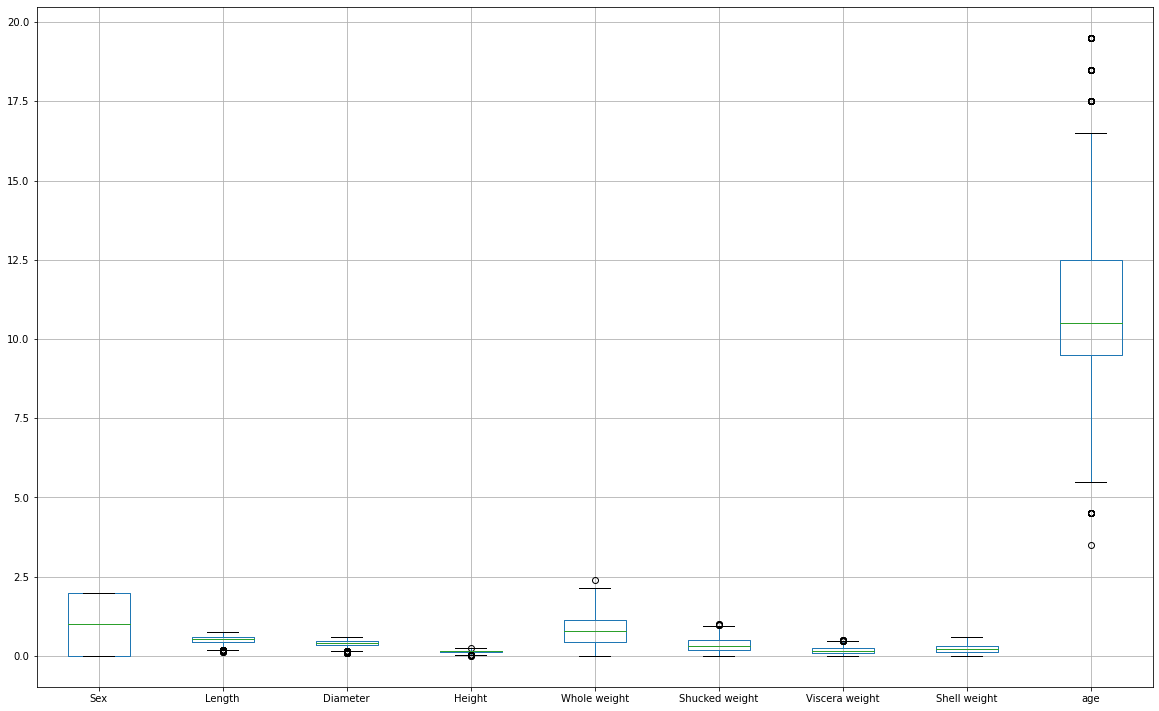

In [519]:
data.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=-0.30)
plt.show()

In [520]:
import statsmodels.formula.api as smf
lr=LinearRegression()
lr=smf.ols(formula="age ~ Sex",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000006AB45A86A0>>


0.0012017399326199607

In [521]:
import statsmodels.formula.api as smf
lr=LinearRegression()
lr=smf.ols(formula="age ~ Sex+Length",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000006AB14E55E0>>


0.3424216263868478

In [522]:
import statsmodels.formula.api as smf
lr=LinearRegression()
lr=smf.ols(formula="age ~ Sex+Length+Diameter",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000006AB406AA30>>


0.36659009605074466

In [523]:

import statsmodels.formula.api as smf
lr=LinearRegression()
lr=smf.ols(formula="age ~ Sex+Length+Diameter+Height",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000006AB3F4FD30>>


0.404257704561093

In [423]:
Whole_weight=data['Whole weight']
Shucked_weight=data['Shucked weight']
Viscera_weight=data['Viscera weight']
Shell_weight=data['Shell weight']
import statsmodels.formula.api as smf
lr=LinearRegression()
lr=smf.ols(formula="age ~ Sex+Length+Diameter+Height+Whole_weight+Shucked_weight+Viscera_weight+Shell_weight",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000006AAD1456D0>>


0.5231143072157138

In [524]:
X = data.drop('age', axis = 1)
y = data['age']

## Standarize the 'X' features

In [525]:
#from sklearn.preprocessing import power_transform
#X=power_transform(X,method='yeo-johnson')

In [526]:
sc = StandardScaler()
X_scalar=sc.fit_transform(X)

In [527]:
#selectkBest = SelectKBest(k='all')
#X_new = selectkBest.fit_transform(X_scalar, y)

X_train, X_test, y_train, y_test = train_test_split(X_scalar, y, test_size = 0.25)

In [528]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


model = linear_model.LinearRegression()
model.fit(X_train, y_train)
    
    
    

LinearRegression()

In [529]:
Y_pred_train = model.predict(X_train)

In [530]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, Y_pred_train))

Coefficients: [ 0.0555668  -0.14158664  1.10654973  0.82974404  3.19357274 -3.51890994
 -0.70534776  0.83164327]
Intercept: 11.097113460647863
Mean squared error (MSE): 3.53
Coefficient of determination (R^2): 0.53


In [531]:
Y_pred_test = model.predict(X_test)

In [532]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, Y_pred_test))

Coefficients: [ 0.0555668  -0.14158664  1.10654973  0.82974404  3.19357274 -3.51890994
 -0.70534776  0.83164327]
Intercept: 11.097113460647863
Mean squared error (MSE): 3.98
Coefficient of determination (R^2): 0.51


In [533]:
ridgecv=RidgeCV()
ridgecv.fit(X_train,y_train)
ridgecv.alpha_
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)


0.5094075546827368

In [534]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dt = DecisionTreeRegressor(criterion='mse',max_depth=5) 
  
# fit the regressor with X and Y data
dt.fit(X_train, y_train)
dt.score(X_train,y_train)
dt.score(X_test,y_test)

0.4752254913864865

In [535]:
regressor = RandomForestRegressor(criterion='mse', max_depth=7, n_estimators=18,min_samples_split=5,min_samples_leaf=1)
regressor.fit(X_train, y_train) 
regressor.score(X_train,y_train)
regressor.score(X_test,y_test)

0.5338321084903705

In [548]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'n_estimators': [10, 25, 50, 100, 150, 200],
                       'max_features':['auto','sqrt','log2'],
                       'max_depth':[1, 2, 3, 4, 5]}
search = RandomizedSearchCV(estimator = regressor, param_distributions = param_distributions, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=10, verbose=10, return_train_score=True)

In [549]:
search.fit(X_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(max_depth=7,
                                                   min_samples_split=5,
                                                   n_estimators=18),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=10)

In [550]:
best_model = search.best_estimator_
best_model

RandomForestRegressor(max_depth=5, min_samples_split=5)

In [ ]:
## we got error as 1.4 so we got score as 86%

In [556]:
mod=RandomForestRegressor(max_depth=5,min_samples_split=5)
mod.fit(X_train,y_train)
pred=mod.predict(X_test)
print(mean_absolute_error(y_test,pred))

1.4630452364242603


### Saving The model

In [457]:
import joblib
joblib.dump(mod,"AbaloneCaseStudy.pkl")

['AbaloneCaseStudy.pkl']